# Работу выполнил ***Ислам Закиров*** БИВТ-22-16

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
import numpy as np

In [2]:
train_data = pd.read_csv('Life_train.csv')

In [3]:
test_data = pd.read_csv('Life_test.csv')

## Общая информация о данных

In [10]:
train_data.columns

Index(['Year', 'Life expectancy ', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [5]:
print(train_data.head())
print(train_data.info())
print(test_data.head())
print(test_data.info())

   Year  Life expectancy   Adult Mortality  infant deaths  Alcohol  \
0  2014              59.9            271.0             64     0.01   
1  2013              59.9            268.0             66     0.01   
2  2012              59.5            272.0             69     0.01   
3  2011              59.2            275.0             71     0.01   
4  2010              58.8            279.0             74     0.01   

   percentage expenditure  Hepatitis B  Measles    BMI   under-five deaths   \
0               73.523582         62.0       492   18.6                  86   
1               73.219243         64.0       430   18.1                  89   
2               78.184215         67.0      2787   17.6                  93   
3                7.097109         68.0      3013   17.2                  97   
4               79.679367         66.0      1989   16.7                 102   

   Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0   58.0               8.

## Анализ пропусков

In [6]:
missing_train = train_data.isnull().sum()
missing_test = test_data.isnull().sum()

print("Пропуски в тренировочном датасете:")
print(missing_train[missing_train > 0])

print("\nПропуски в тестовом датасете:")
print(missing_test[missing_test > 0])


Пропуски в тренировочном датасете:
Alcohol                            167
Hepatitis B                        480
 BMI                                28
Polio                               18
Total expenditure                  196
Diphtheria                          18
GDP                                386
Population                         554
 thinness  1-19 years               28
 thinness 5-9 years                 28
Income composition of resources    146
Schooling                          146
dtype: int64

Пропуски в тестовом датасете:
Alcohol                            26
Hepatitis B                        73
 BMI                                4
Polio                               1
Total expenditure                  30
Diphtheria                          1
GDP                                57
Population                         90
 thinness  1-19 years               4
 thinness 5-9 years                 4
Income composition of resources    14
Schooling                          

## Визуализация пропусков

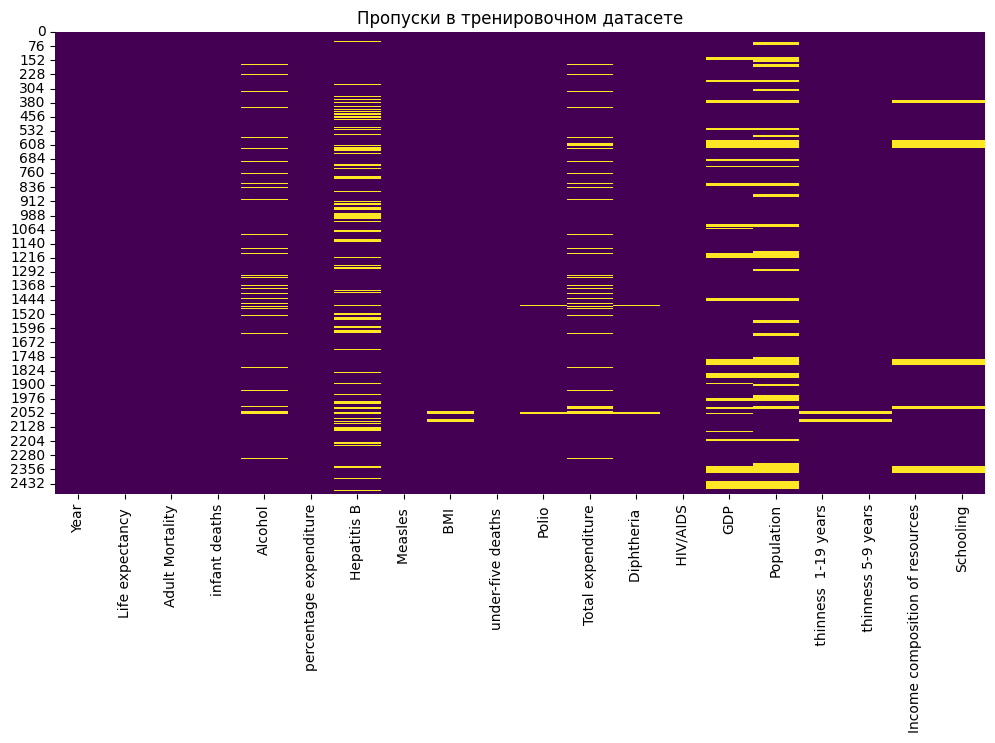

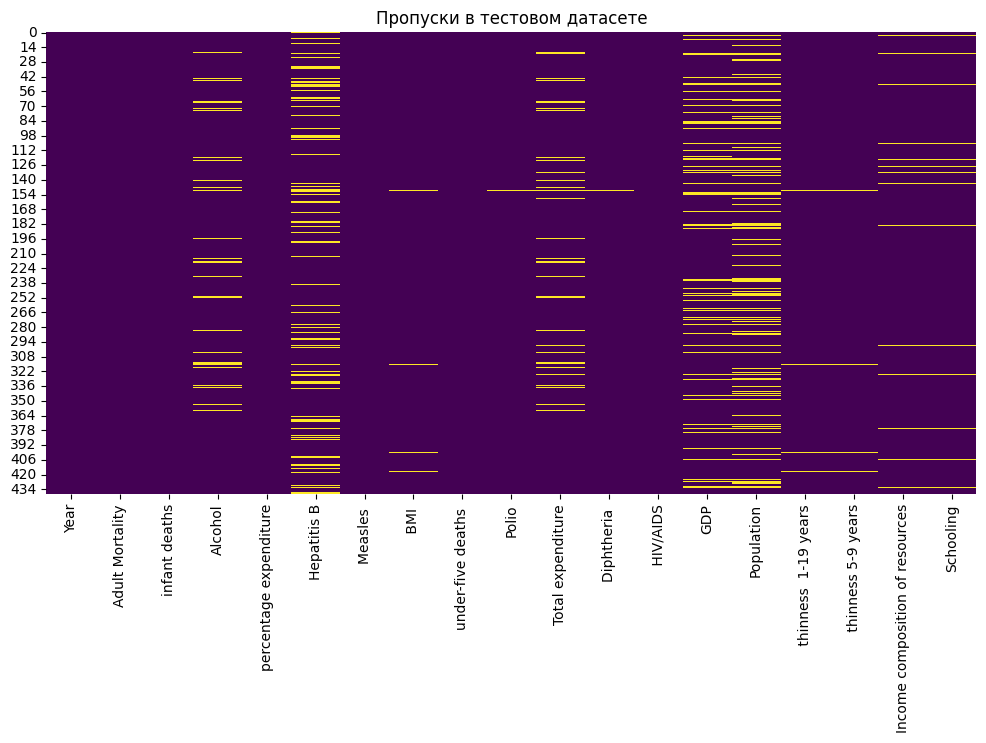

In [7]:
plt.figure(figsize=(12, 6))
sns.heatmap(train_data.isnull(), cbar=False, cmap='viridis')
plt.title('Пропуски в тренировочном датасете')
plt.show()

plt.figure(figsize=(12, 6))
sns.heatmap(test_data.isnull(), cbar=False, cmap='viridis')
plt.title('Пропуски в тестовом датасете')
plt.show()

## Статистический анализ

In [8]:
print(train_data.describe())
print(test_data.describe())

              Year  Life expectancy   Adult Mortality  infant deaths  \
count  2489.000000       2489.000000      2489.000000    2489.000000   
mean   2007.453998         69.135677       165.517075      31.925271   
std       4.593657          9.626188       125.091120     122.898636   
min    2000.000000         36.300000         1.000000       0.000000   
25%    2003.000000         63.000000        74.000000       0.000000   
50%    2007.000000         72.100000       144.000000       3.000000   
75%    2011.000000         75.700000       228.000000      23.000000   
max    2015.000000         89.000000       723.000000    1800.000000   

           Alcohol  percentage expenditure  Hepatitis B       Measles   \
count  2322.000000             2489.000000  2009.000000    2489.000000   
mean      4.600060              719.997905    80.884520    2508.917638   
std       4.021613             1968.953987    25.110227   11795.371317   
min       0.010000                0.000000     1.000000

## Корреляционный анализ

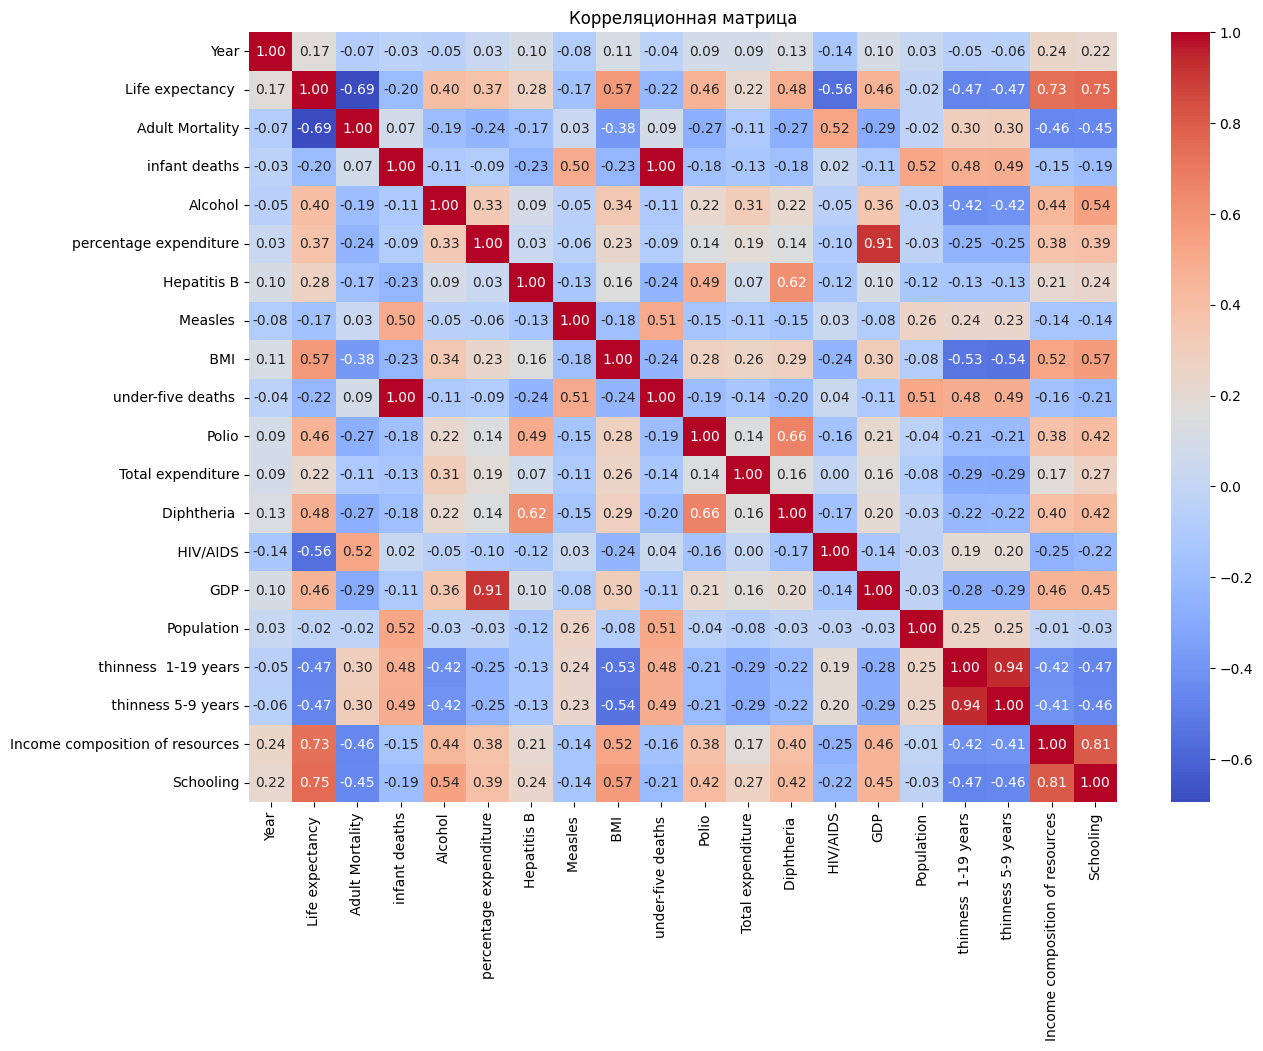

In [9]:
correlation_matrix = train_data.corr()

plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Корреляционная матрица')
plt.show()

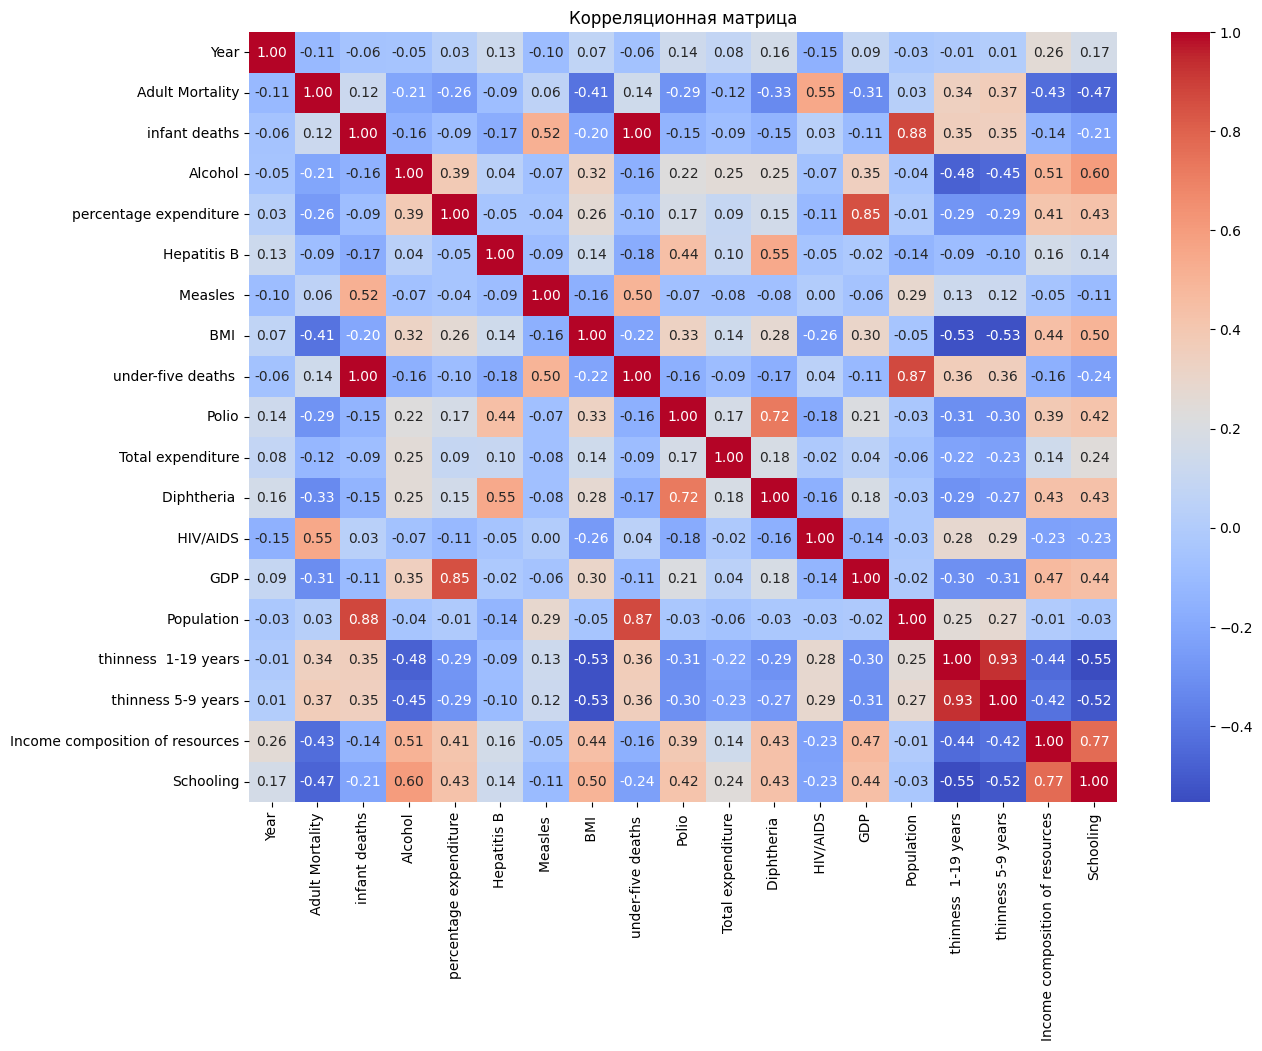

In [10]:
correlation_matrix1 = test_data.corr()

plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix1, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Корреляционная матрица')
plt.show()

## Визуализация зависимостей

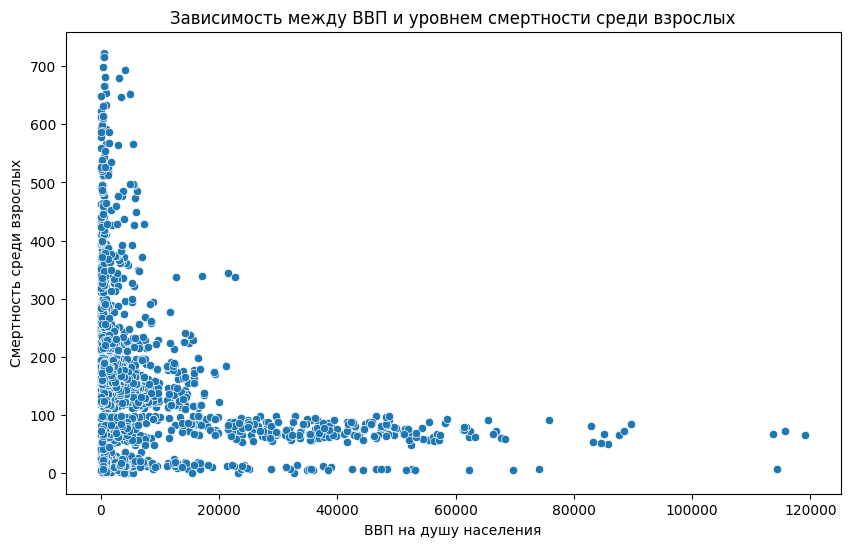

In [11]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=train_data, x='GDP', y='Adult Mortality')
plt.title('Зависимость между ВВП и уровнем смертности среди взрослых')
plt.xlabel('ВВП на душу населения')
plt.ylabel('Смертность среди взрослых')
plt.show()

## Моделирование

In [4]:
train_data.fillna(train_data.mean(), inplace=True)
test_data.fillna(test_data.mean(), inplace=True)

target_variable = 'Life expectancy '

X = train_data.drop(columns=[target_variable])
y = train_data[target_variable]

X = pd.get_dummies(X, drop_first=True)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

val_predictions = model.predict(X_val)
mse = mean_squared_error(y_val, val_predictions)
print(f'Mean Squared Error: {mse}')

test_data = pd.get_dummies(test_data, drop_first=True)
test_data.fillna(0, inplace=True)

X_test = test_data.reindex(columns=X.columns, fill_value=0)

test_predictions = model.predict(X_test)

submission = pd.DataFrame({
    'index': test_data.index,
    'Life expectancy': test_predictions
})

submission.to_csv('submission11112.csv', index=False)

Mean Squared Error: 17.393997849977687


In [20]:
submission

,index,Life expectancy
0,0,75.957817
1,1,75.667959
2,2,73.720377
3,3,64.355725
4,4,65.733982
...,...,...
434,434,65.725473
435,435,72.940297
436,436,76.688900
437,437,82.172316


In [15]:
x_train = train_data.drop(columns=["Life expectancy "])
y_train = train_data["Life expectancy "]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(x_train)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_scaled)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y_train, test_size=0.2, random_state=42)

model = Ridge()
model.fit(X_train, y_train)
submission = model.predict(X_test)

cv_scores = cross_val_score(model, X_train, y_train, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))
print(mean_squared_error(submission, y_test))

Cross-Validation Scores: [0.87033799 0.88315996 0.90233356 0.90568495 0.7635978 ]
Mean CV Score: 0.8650228512077826
13.797642722891611


In [16]:
x_train = train_data.drop(columns=["Life expectancy "])
y_train = train_data["Life expectancy "]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(x_train)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_scaled)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y_train, test_size=0.2, random_state=42)

model = Lasso(alpha=0.1)
model.fit(X_train, y_train)
subm = model.predict(X_test)

cv_scores = cross_val_score(model, X_train, y_train, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))
print(mean_squared_error(subm, y_test))

test_scaled = scaler.transform(test_data)
test_poly = poly.transform(test_scaled)

submission = model.predict(test_poly)

submission = pd.DataFrame({'index': np.arange(len(submission)), "Life expectancy": submission})
out_df

out_df.to_csv("submission1111111111111111111111112.csv", index=False)

Cross-Validation Scores: [0.88491121 0.89680307 0.8928207  0.90932624 0.86966372]
Mean CV Score: 0.8907049861581546
9.514467489170228
